In [ ]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from PIL import Image
from tqdm import tqdm
import random as rnd
import cv2

from livelossplot import PlotLossesKeras

%matplotlib inline

In [50]:
HWAD = './happy-whale-and-dolphin/'
TRAIN_DIR = './happy-whale-and-dolphin/train_images/'
TEST_DIR = './happy-whale-and-dolphin/test_images/'

train_df = pd.read_csv(HWAD + 'train.csv')
train_df['path'] = TRAIN_DIR + train_df['image']

pred_df = pd.read_csv(HWAD + 'sample_submission.csv')
pred_df['path'] = TEST_DIR + pred_df['image']

train_df.head()

,image,species,individual_id,path
0,00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9,./happy-whale-and-dolphin/train_images/00021ad...
1,000562241d384d.jpg,humpback_whale,1a71fbb72250,./happy-whale-and-dolphin/train_images/0005622...
2,0007c33415ce37.jpg,false_killer_whale,60008f293a2b,./happy-whale-and-dolphin/train_images/0007c33...
3,0007d9bca26a99.jpg,bottlenose_dolphin,4b00fe572063,./happy-whale-and-dolphin/train_images/0007d9b...
4,00087baf5cef7a.jpg,humpback_whale,8e5253662392,./happy-whale-and-dolphin/train_images/00087ba...


In [51]:
train_df['species'].replace({
    'bottlenose_dolpin' : 'bottlenose_dolphin',
    'kiler_whale' : 'killer_whale',
    'beluga' : 'beluga_whale',
    'globis' : 'short_finned_pilot_whale',
    'pilot_whale' : 'short_finned_pilot_whale'
},inplace =True)


train_df['class'] = train_df['species'].apply(lambda x: x.split('_')[-1])
train_df.head()

C:\Users\domen\AppData\Local\Temp\ipykernel_19328\1299628631.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['species'].replace({


,image,species,individual_id,path,class
0,00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9,./happy-whale-and-dolphin/train_images/00021ad...,whale
1,000562241d384d.jpg,humpback_whale,1a71fbb72250,./happy-whale-and-dolphin/train_images/0005622...,whale
2,0007c33415ce37.jpg,false_killer_whale,60008f293a2b,./happy-whale-and-dolphin/train_images/0007c33...,whale
3,0007d9bca26a99.jpg,bottlenose_dolphin,4b00fe572063,./happy-whale-and-dolphin/train_images/0007d9b...,dolphin
4,00087baf5cef7a.jpg,humpback_whale,8e5253662392,./happy-whale-and-dolphin/train_images/00087ba...,whale


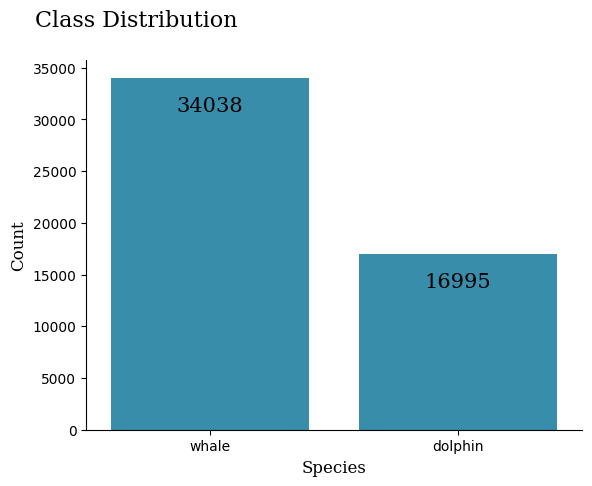

In [52]:


plot = sns.countplot(x = train_df['class'], color = '#2596be')
sns.despine()
plot.set_title('Class Distribution\n', font = 'serif', x = 0.1, y=1, fontsize = 16);
plot.set_ylabel("Count", x = 0.02, font = 'serif', fontsize = 12)
plot.set_xlabel("Species", fontsize = 12, font = 'serif')

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2, p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, -20),font = 'serif', textcoords = 'offset points', size = 15)



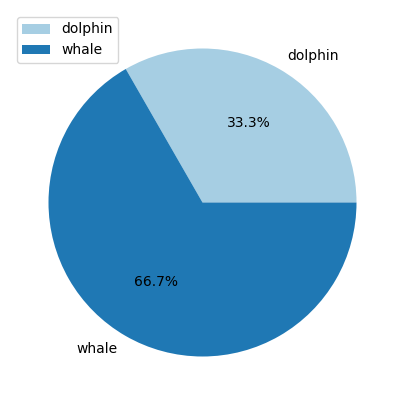

In [53]:


plt.figure(figsize=(5,5))
class_cnt = train_df.groupby(['class']).size().reset_index(name = 'counts')
colors = sns.color_palette('Paired')[0:9]
plt.pie(class_cnt['counts'], labels=class_cnt['class'], colors=colors, autopct='%1.1f%%')
plt.legend(loc='upper left')
plt.show()

C:\Users\domen\AppData\Local\Temp\ipykernel_19328\3641098070.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, y = 'species',  palette='crest', dodge=False)


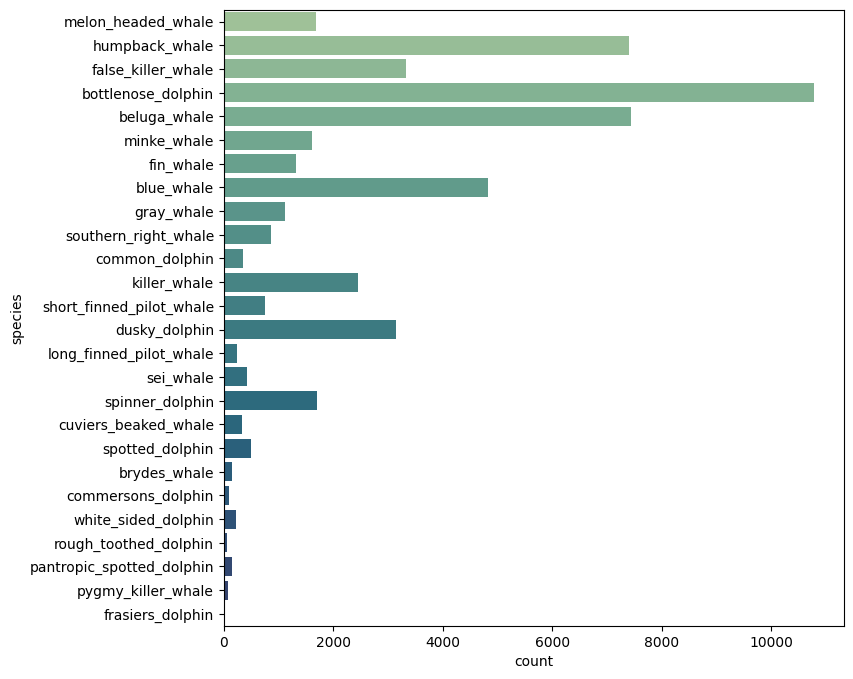

In [54]:


plt.figure(figsize=(8,8))
sns.countplot(data=train_df, y = 'species',  palette='crest', dodge=False)
plt.show()



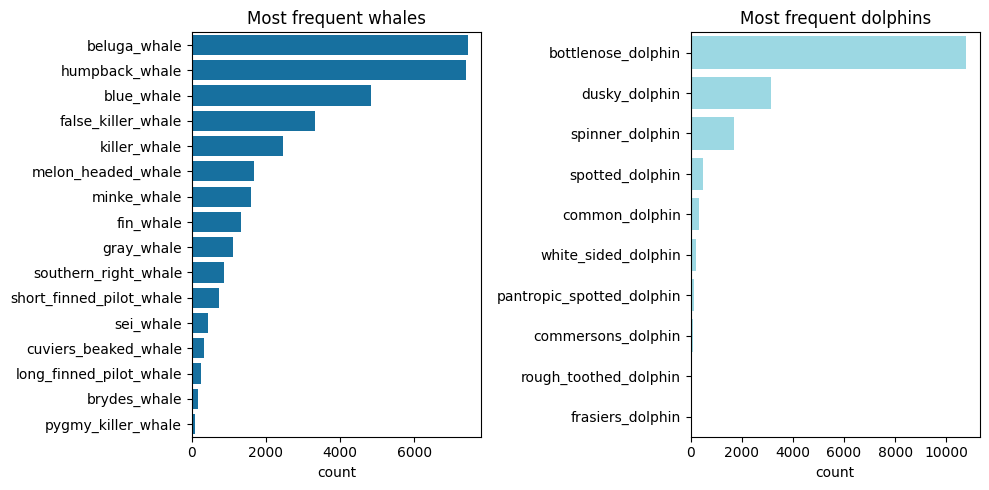

In [55]:


fig,ax = plt.subplots(1,2,figsize=(10,5))

whales = train_df[train_df['class']=='whale']
dolphins = train_df[train_df['class']!='whale']

sns.countplot(y="species", data=whales, order=whales.iloc[0:]["species"].value_counts().index, ax=ax[0], color = "#0077b6")
ax[0].set_title('Most frequent whales')
ax[0].set_ylabel(None)
    
sns.countplot(y="species", data=dolphins,order=dolphins.iloc[0:]["species"].value_counts().index, ax=ax[1], color = "#90e0ef")
ax[1].set_title('Most frequent dolphins')
ax[1].set_ylabel(None)

plt.tight_layout()
plt.show()



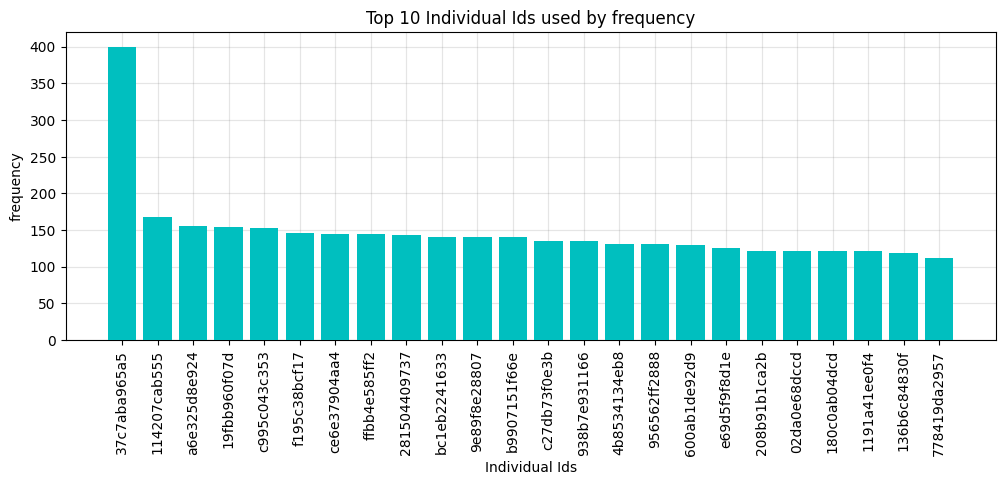

In [56]:


plt.figure(figsize=(12,4))
top_ten_ids = train_df.individual_id.value_counts().head(24)
top_ten_ids = pd.DataFrame({'individual_id':top_ten_ids.index, 'frequency':top_ten_ids.values})

plt.bar(top_ten_ids['individual_id'],top_ten_ids['frequency'],width = 0.8,color='c',zorder=4)
plt.xticks(rotation=90)
plt.ylabel("frequency")
plt.xlabel("Individual Ids")
plt.title("Top 10 Individual Ids used by frequency")
plt.grid(visible = True, color ='grey',linestyle ='-', linewidth = 0.9,alpha = 0.2, zorder=0)
plt.show()



In [57]:



train_df['count'] = train_df.groupby('individual_id',as_index=False)['individual_id'].transform(lambda x: x.count())
train_df.head()



,image,species,individual_id,path,class,count
0,00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9,./happy-whale-and-dolphin/train_images/00021ad...,whale,1
1,000562241d384d.jpg,humpback_whale,1a71fbb72250,./happy-whale-and-dolphin/train_images/0005622...,whale,2
2,0007c33415ce37.jpg,false_killer_whale,60008f293a2b,./happy-whale-and-dolphin/train_images/0007c33...,whale,64
3,0007d9bca26a99.jpg,bottlenose_dolphin,4b00fe572063,./happy-whale-and-dolphin/train_images/0007d9b...,dolphin,65
4,00087baf5cef7a.jpg,humpback_whale,8e5253662392,./happy-whale-and-dolphin/train_images/00087ba...,whale,50


In [58]:


tmp = train_df[train_df['count'] == 1]
print(len(tmp)/len(train_df.individual_id.unique()))
print(len(tmp)/len(train_df))



0.5939565022133829
0.18141202751161015


In [59]:
widths, heights = [], []

for path in tqdm(train_df["path"]):
    width, height = Image.open(path).size
    widths.append(width)
    heights.append(height)
    
train_df["width"] = widths
train_df["height"] = heights
train_df["dimension"] = train_df["width"] * train_df["height"]

100%|███████████████████████████████████████████████████████████████| 51033/51033 [03:19<00:00, 256.15it/s]


In [60]:
train_df.to_csv(HWAD + 'train2.csv', index=False)

## Color analysis

In [61]:


def is_grey_scale(givenImage):
    w,h = givenImage.size
    for i in range(w):
        for j in range(h):
            r,g,b = givenImage.getpixel((i,j))
            if r != g != b: return False
    return True


print("Color scale of train images")
sampleFrac = 0.1
#get our sampled images
isGreyList = []
for imageName in train_df['path'].sample(frac=sampleFrac):
    val = Image.open(imageName).convert('RGB')
    isGreyList.append(is_grey_scale(val))
print(np.sum(isGreyList) / len(isGreyList))
del isGreyList


print("Color scale of test images")
sampleFrac = 0.1
#get our sampled images
isGreyList_test = []
for imageName in pred_df['path'].sample(frac=sampleFrac):
    val = Image.open(imageName).convert('RGB')
    isGreyList_test.append(is_grey_scale(val))
print(np.sum(isGreyList_test) / len(isGreyList_test))
del isGreyList_test


print("mean intensity for each channel RGB")
def get_rgb_men(row):
    img = cv2.imread(row['path'])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return np.sum(img[:,:,0]), np.sum(img[:,:,1]), np.sum(img[:,:,2])

tqdm.pandas()
train_df['R'], train_df['G'], train_df['B'] = zip(*train_df.progress_apply(lambda row: get_rgb_men(row), axis=1) )



Color scale of train images


KeyboardInterrupt: 

## Color distribution

In [62]:


def show_color_dist(df, count):
    fig, axr = plt.subplots(count,2,figsize=(15,15))
    for idx, i in enumerate(np.random.choice(df['path'], count)):
        img = cv2.imread(i)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axr[idx,0].imshow(img)
        axr[idx,0].axis('off')
        axr[idx,1].set_title('R={:.0f}, G={:.0f}, B={:.0f} '.format(np.mean(img[:,:,0]), np.mean(img[:,:,1]), np.mean(img[:,:,2]))) 
        x, y = np.histogram(img[:,:,0], bins=255)
        axr[idx,1].bar(y[:-1], x, label='R', alpha=0.8, color='red')
        x, y = np.histogram(img[:,:,1], bins=255)
        axr[idx,1].bar(y[:-1], x, label='G', alpha=0.8, color='green')
        x, y = np.histogram(img[:,:,2], bins=255)
        axr[idx,1].bar(y[:-1], x, label='B', alpha=0.8, color='blue')
        axr[idx,1].legend()
        axr[idx,1].axis('off')


print("Images with high intensity of R channel")
df = train_df[((train_df['B']*1.05) < train_df['R']) & ((train_df['G']*1.05) < train_df['R'])]
show_color_dist(df, 8)


print("Images with high intensity of G channel")
df = train_df[(train_df['B'] > 1.3*train_df['R']) & (train_df['B'] > 1.3*train_df['G'])]
show_color_dist(df, 8)

print("Images with high intensity of B channel")
df = train_df[(train_df['G'] > 1.05*train_df['R']) & (train_df['G'] > 1.05*train_df['B'])]
show_color_dist(df, 8)

Images with high intensity of R channel


KeyError: 'B'

In [48]:


from tensorflow.keras.preprocessing.image import ImageDataGenerator
from numpy import expand_dims



In [49]:
def plot_augimages(paths, datagen):
    plt.figure(figsize = (14,28))
    plt.suptitle('Augmented Images')
    
    midx = 0
    for path in paths:
        data = Image.open(path)
        data = data.resize((224,224))
        samples = expand_dims(data, 0)
        it = datagen.flow(samples, batch_size=1)
    
        # Show Original Image
        plt.subplot(10,5, midx+1)
        plt.imshow(data)
        plt.axis('off')
    
        # Show Augmented Images
        for idx, i in enumerate(range(4)):
            midx += 1
            plt.subplot(10,5, midx+1)
            
            batch = it.next()
            image = batch[0].astype('uint8')
            plt.imshow(image)
            plt.axis('off')
        midx += 1
    
    plt.tight_layout()
    plt.show()

    
datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.10,
    brightness_range=[0.6,1.4],
    channel_shift_range=0.7,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
) 
plot_augimages(np.random.choice(train_df['path'],10), datagen)

FileNotFoundError: [Errno 2] No such file or directory: './data/train/dd0854f494a27d.jpg'

<Figure size 1400x2800 with 0 Axes>